In [ ]:
# This notebook is used to merge and clean epa and census data
# The final data set is saved as a new csv file

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# reading the census and EPA data

# census data
df_census = pd.read_csv('../data/census_data/acs_all_tracts_cleaned.csv')
# epa data
df_epa = pd.read_csv('../data/epa_data/epa_tracts_continental_us.csv')

In [53]:
len(df_census), len(df_epa)

(85395, 83482)

In [54]:
len(df_census.columns), len(df_epa.columns)

(64, 48)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85395 entries, 0 to 85394
Columns: 111 entries, ID to PS_PWDIS
dtypes: float64(106), int64(1), object(4)
memory usage: 72.3+ MB


<Axes: >

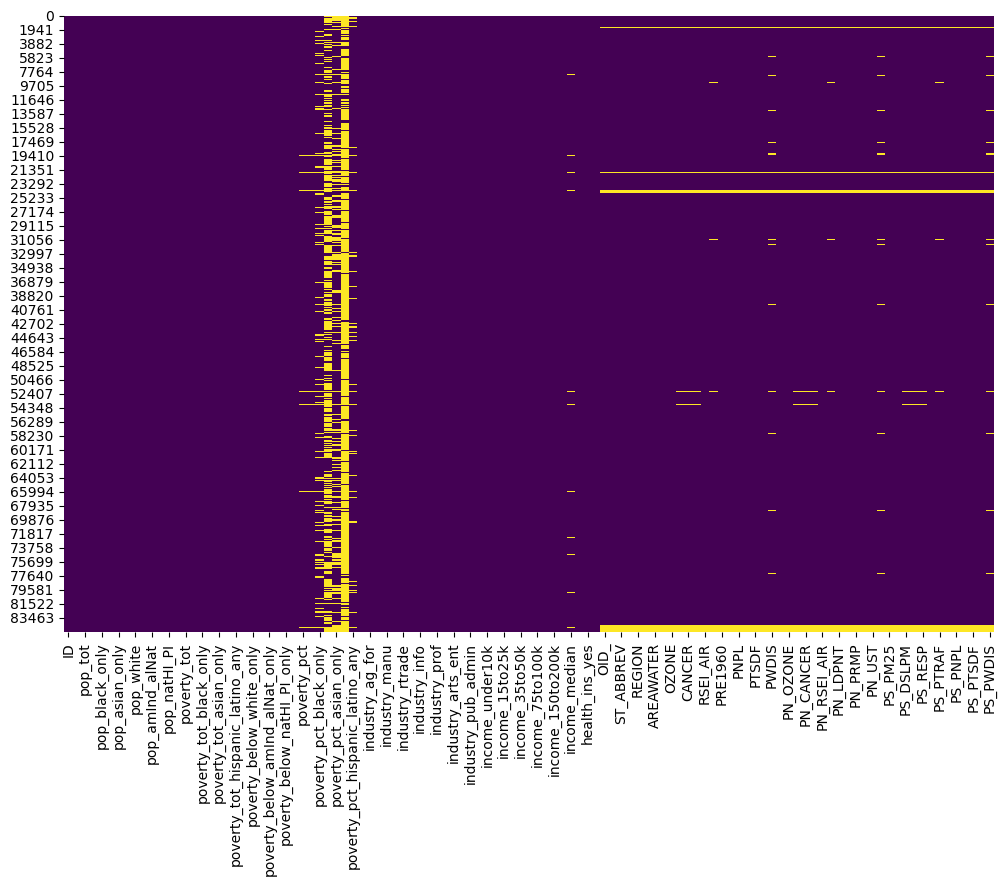

In [61]:
# merging census and epa data

df_merged = pd.merge(df_census, df_epa, how='left', on='ID')
df_merged.info()

# heatmap of null values
plt.figure(figsize=(12,8))
sns.heatmap(df_merged.isnull(), cmap='viridis', cbar=False)

In [62]:
# Printing null count

print('\nCOLUMN NAME : NULL COUNT')
for col in df_merged.columns: 
    print(col, ':', sum(df_merged[col].isnull()))



COLUMN NAME : NULL COUNT
ID : 0
NAME : 0
pop_tot : 0
pop_white_only : 0
pop_black_only : 0
pop_amInd_alNat_only : 0
pop_asian_only : 0
pop_natHI_PI_only : 0
pop_white : 0
pop_black : 0
pop_amInd_alNat : 0
pop_asian : 0
pop_natHI_PI : 0
pop_hispanic_latino_any : 0
poverty_tot : 0
poverty_tot_white_only : 0
poverty_tot_black_only : 0
poverty_tot_amInd_alNat_only : 0
poverty_tot_asian_only : 0
poverty_tot_natHI_PI_only : 0
poverty_tot_hispanic_latino_any : 0
poverty_below : 0
poverty_below_white_only : 0
poverty_below_black_only : 0
poverty_below_amInd_alNat_only : 0
poverty_below_asian_only : 0
poverty_below_natHI_PI_only : 0
poverty_below_hispanic_latino_any : 0
poverty_pct : 1071
poverty_pct_white_only : 1238
poverty_pct_black_only : 11742
poverty_pct_amInd_alNat_only : 48442
poverty_pct_asian_only : 21549
poverty_pct_natHI_PI_only : 75274
poverty_pct_hispanic_latino_any : 4778
industry_tot : 0
industry_ag_for : 0
industry_const : 0
industry_manu : 0
industry_wtrade : 0
industry_rtrad

In [63]:
# Checking total land area of states to confirm units

#converting m^2 AREALAND to km^2
df_merged.groupby(['STATE_NAME'])['AREALAND'].sum()*1e-6

STATE_NAME
Alabama                 131175.477769
Arizona                 294363.973043
Arkansas                134660.767709
California              403671.756816
Colorado                268418.796417
Connecticut              12541.690473
Delaware                  5046.731559
District of Columbia       158.316124
Florida                 138961.722096
Georgia                 149486.624386
Idaho                   214049.931578
Illinois                143778.561906
Indiana                  92789.363558
Iowa                    144659.721012
Kansas                  211753.717642
Kentucky                102283.004821
Louisiana               111915.258185
Maine                    79888.263364
Maryland                 25151.992308
Massachusetts            20204.390225
Michigan                146614.937132
Minnesota               206232.627084
Mississippi             121533.935354
Missouri                178052.333716
Montana                 376973.729130
Nebraska                198957.385713
N

In [64]:
# calculating population density in population per km^2
df_merged['pop_density'] = df_merged['pop_tot']/(df_merged['AREALAND']*1e-6)
df_merged.head()

,ID,NAME,pop_tot,pop_white_only,pop_black_only,pop_amInd_alNat_only,pop_asian_only,pop_natHI_PI_only,pop_white,pop_black,...,PS_RESP,PS_RSEI_AIR,PS_PTRAF,PS_LDPNT,PS_PNPL,PS_PRMP,PS_PTSDF,PS_UST,PS_PWDIS,pop_density
0,1001020100,"Census Tract 201, Autauga County, Alabama",1791.0,1502.0,171.0,0.0,38.0,0.0,1582.0,199.0,...,57.0,48.0,29.0,80.0,79.0,32.0,23.0,32.0,87.0,182.284436
1,1001020200,"Census Tract 202, Autauga County, Alabama",2010.0,785.0,1088.0,0.0,0.0,0.0,882.0,1175.0,...,57.0,54.0,68.0,80.0,81.0,35.0,25.0,72.0,88.0,605.272556
2,1001020300,"Census Tract 203, Autauga County, Alabama",3577.0,2433.0,983.0,0.0,26.0,0.0,2457.0,1105.0,...,57.0,56.0,58.0,35.0,82.0,35.0,27.0,69.0,48.0,668.689248
3,1001020400,"Census Tract 204, Autauga County, Alabama",3802.0,3410.0,251.0,18.0,14.0,0.0,3519.0,268.0,...,57.0,59.0,85.0,33.0,86.0,38.0,31.0,79.0,18.0,595.525072
4,1001020501,"Census Tract 205.01, Autauga County, Alabama",4381.0,3323.0,976.0,0.0,28.0,0.0,3348.0,1005.0,...,57.0,61.0,70.0,4.0,91.0,44.0,38.0,80.0,76.0,706.196703


<Axes: >

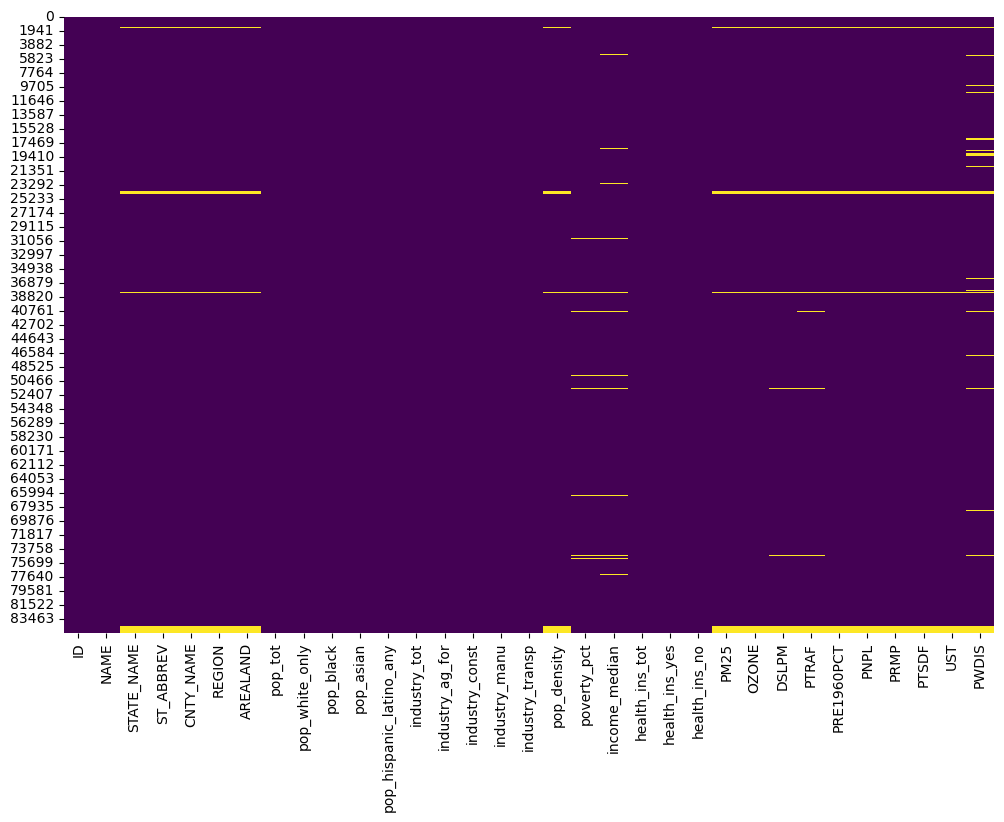

In [65]:
# Selecting columns to keep and printing new heatmap

select_columns = [
'ID',
'NAME',
# geo info
'STATE_NAME',
'ST_ABBREV',
'CNTY_NAME',
'REGION',
'AREALAND',
# race
'pop_tot',
'pop_white_only',
'pop_black',
'pop_asian',
'pop_hispanic_latino_any',
# industry
'industry_tot',
'industry_ag_for',
'industry_const',
'industry_manu',
'industry_transp',
# economic
'pop_density',
'poverty_pct',
'income_median',
'health_ins_tot',
'health_ins_yes',
'health_ins_no',
# EPA
'PM25',
'OZONE',
'DSLPM',
'PTRAF',
'PRE1960PCT',
'PNPL',
'PRMP',
'PTSDF',
'UST',
'PWDIS',
]

df_merged_clean = df_merged[select_columns]

plt.figure(figsize=(12,8))
sns.heatmap(df_merged_clean.isnull(), cmap='viridis', cbar=False)

Number of Tracts Removed From EPA Before Merging:  1913

COLUMN NAME : NULL COUNT
ID : 0
NAME : 0
STATE_NAME : 0
ST_ABBREV : 0
CNTY_NAME : 0
REGION : 0
AREALAND : 0
pop_tot : 0
pop_white_only : 0
pop_black : 0
pop_asian : 0
pop_hispanic_latino_any : 0
industry_tot : 0
industry_ag_for : 0
industry_const : 0
industry_manu : 0
industry_transp : 0
pop_density : 0
poverty_pct : 677
income_median : 1220
health_ins_tot : 0
health_ins_yes : 0
health_ins_no : 0
PM25 : 6
OZONE : 6
DSLPM : 215
PTRAF : 416
PRE1960PCT : 0
PNPL : 0
PRMP : 0
PTSDF : 0
UST : 0
PWDIS : 2279


<Axes: >

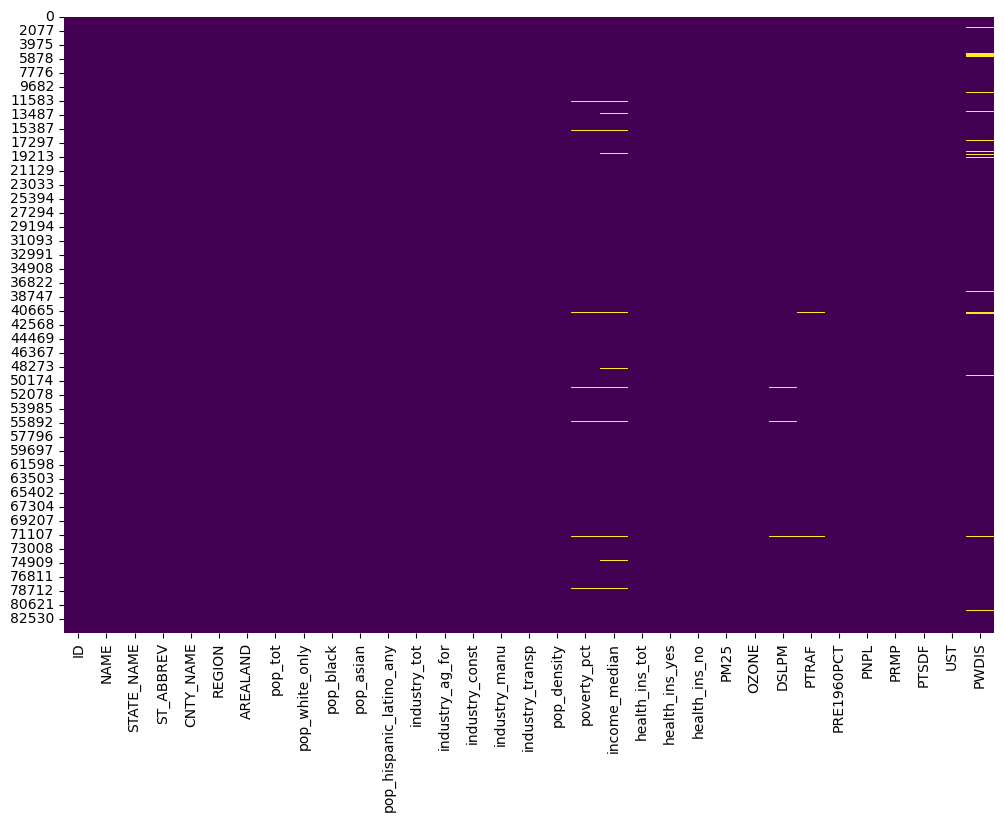

In [66]:
# Cut rows that are completely missing from EPA: (Alaska, Puerto Rico)

missing_epa = df_merged_clean[df_merged_clean['STATE_NAME'].isnull()]
print("Number of Tracts Removed From EPA Before Merging: ", len(missing_epa.index))

df_merged_clean = df_merged_clean.drop(missing_epa.index)

# re-print null count
print('\nCOLUMN NAME : NULL COUNT')
for col in df_merged_clean.columns: 
    print(col, ':', sum(df_merged_clean[col].isnull()))

# heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_merged_clean.isnull(), cmap='viridis', cbar=False)

Number of Tracts to Cut:  3331
Number of Rural Tracts to Cut:  2062
Number of Urban Tracts to Cut:  1269
% rows cut at national level:  3.990081694257445

<class 'pandas.core.frame.DataFrame'>
Index: 80151 entries, 0 to 84413
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       80151 non-null  int64  
 1   NAME                     80151 non-null  object 
 2   STATE_NAME               80151 non-null  object 
 3   ST_ABBREV                80151 non-null  object 
 4   CNTY_NAME                80151 non-null  object 
 5   REGION                   80151 non-null  float64
 6   AREALAND                 80151 non-null  float64
 7   pop_tot                  80151 non-null  float64
 8   pop_white_only           80151 non-null  float64
 9   pop_black                80151 non-null  float64
 10  pop_asian                80151 non-null  float64
 11  pop_hispanic_latino_any  80151 non

<Axes: >

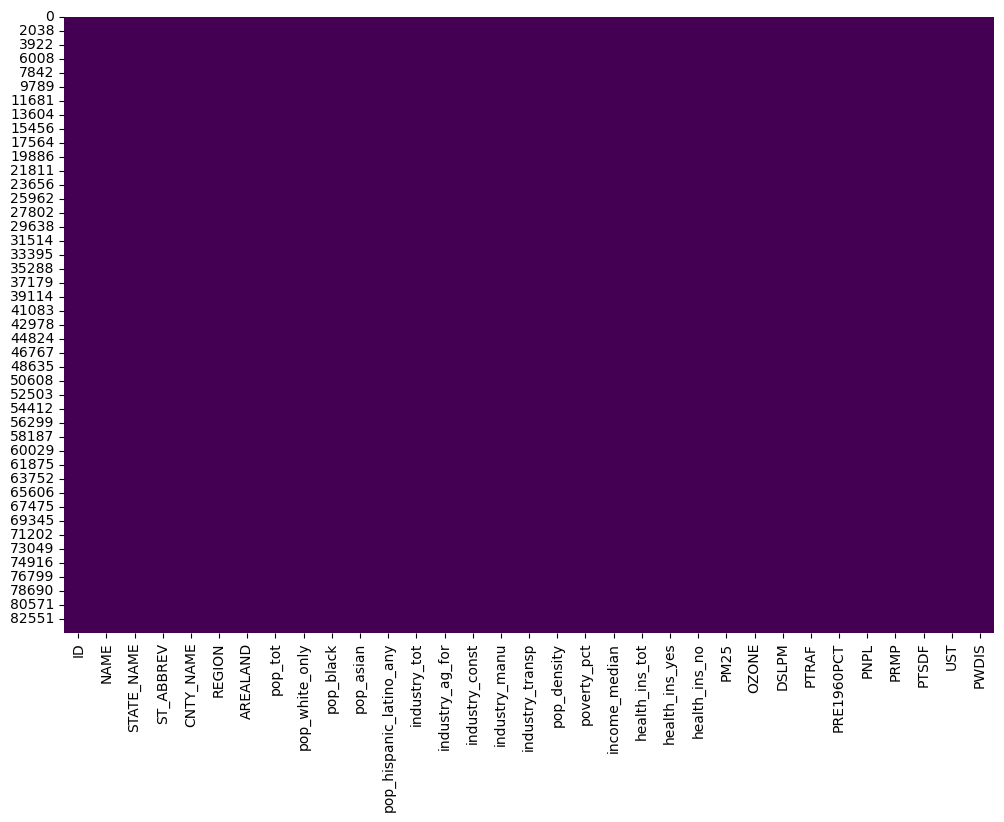

In [67]:
# Cut rows with ANY null value: 

cut_rows = df_merged_clean[df_merged_clean.isnull().any(axis=1)]
print("Number of Tracts to Cut: ", len(cut_rows.index))

# number of rural tracts removed
cut_rows_rural = cut_rows[cut_rows['pop_density']<500]
print("Number of Rural Tracts to Cut: ", len(cut_rows_rural.index))

# number of urban tracts removed
cut_rows_urban = cut_rows[cut_rows['pop_density']>=500]
print("Number of Urban Tracts to Cut: ", len(cut_rows_urban.index))

print("% rows cut at national level: ", len(cut_rows.index)/len(df_merged_clean)*100)
print('')

df_merged_clean = df_merged_clean.drop(cut_rows.index)
df_merged_clean.info()

# heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_merged_clean.isnull(), cmap='viridis', cbar=False)

In [68]:
# Calculate the Theil Index contributions
def calc_theil(df, char_str):
    '''
    Calculates the generalized entropy index of given agents with an associated characteristic 
    
    Inputs: 
    df - data frame containing population and characteristic data, NEEDS TO BE FOR ENTIRE COUNTRY
    char_str - string, characteristic wanting to be measured (income, race, etc)
    '''
    
    i = df[char_str]
    N = len(i)
    
    xi = df[char_str]
    mu = xi.mean()
    
    # calculate the Theil L index contributions which are more sensitive to changes in the lower end of the distribution than Theil T
    TL_contr = (1/N)*np.log(mu/xi)
    
    # drop characteristics that are 0
    TL_contr[xi == 0] = np.nan
    
    name = 'theil_' + char_str
    
    if name in df:
        print('This column already exists. Recalculating.')
        df = df.drop(columns=[name])
        
    df[name] = TL_contr
    

In [48]:
# Calculating percentages and Theil Index contributions

df = df_merged_clean

# population race percentages
df['pct_pop_white_only'] = df['pop_white_only']/ df['pop_tot']*100
df['pct_pop_black'] = df['pop_black']/ df['pop_tot']*100
df['pct_pop_asian'] = df['pop_asian']/ df['pop_tot']*100
df['pct_pop_hispanic_latino_any'] = df['pop_hispanic_latino_any']/ df['pop_tot']*100

## These produce too many null values: 
# calc_theil(df, 'pop_white_only')
# calc_theil(df, 'pop_black')
# calc_theil(df, 'pop_asian')
# calc_theil(df, 'pop_hispanic_latino_any')

# calculate primary and secondary industry share
df['prim_ind_share'] = (df['industry_ag_for'])/ df['health_ins_tot']*100
df['sec_ind_share'] = (df['industry_const'] + df['industry_manu'])/ df['health_ins_tot']*100
df['health_ins_pct'] = df['health_ins_yes']/ df['health_ins_tot']*100

# theil contribution for median income
calc_theil(df, 'income_median')

df_final = df
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80151 entries, 0 to 84413
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           80151 non-null  int64  
 1   NAME                         80151 non-null  object 
 2   STATE_NAME                   80151 non-null  object 
 3   ST_ABBREV                    80151 non-null  object 
 4   CNTY_NAME                    80151 non-null  object 
 5   REGION                       80151 non-null  float64
 6   AREALAND                     80151 non-null  float64
 7   pop_tot                      80151 non-null  float64
 8   pop_white_only               80151 non-null  float64
 9   pop_black                    80151 non-null  float64
 10  pop_asian                    80151 non-null  float64
 11  pop_hispanic_latino_any      80151 non-null  float64
 12  industry_tot                 80151 non-null  float64
 13  industry_ag_for      

In [69]:
df_final.to_csv('../data/census_epa_theil_cleaned.csv', index=False)

In [71]:
# # Double checking newest file version

# new = pd.read_csv('../data/census_epa_theil_cleaned.csv')

# # old version
# orig_copy = pd.read_csv('../data/census_epa_theil_cleaned_original_copy_01-12-2023.csv')

# print(new.equals(orig_copy))

True
